<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [315]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [316]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [6]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [26]:
df.columns
#tmp

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

In [27]:
df.dtypes
#tmp

profile_gender                                   object
profile_age                                       int64
work_country                                     object
work_province                                    object
profile_years_experience                        float64
work_years_in_company                           float64
work_years_in_current_position                  float64
work_people_in_charge_of                          int64
profile_studies_level                            object
profile_studies_level_state                      object
profile_career                                   object
profile_university                               object
profile_specialization_courses                   object
profile_open_source_contributions                object
profile_programming_as_hobby                     object
work_role                                        object
tools_platform                                   object
tools_programming_languages                     

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [135]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO' , 'profile_age' , 'work_role']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [136]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [137]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,profile_age,work_role,cured_programming_languages
0,ninguno,Ninguno,43000.0,26,Consultant,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,29,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,29,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,29,Developer,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,22,Infosec,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [138]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


In [139]:
interesting_languages = ['javascript','sql','html','python']

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [140]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
#interesting_languages = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,profile_age,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,29,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,29,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,29,Developer,"[html, javascript, python]"
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,39,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,39,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


In [141]:
df_lang.isna().sum()

programming_language             0
tools_programming_languages      0
salary_monthly_NETO            647
profile_age                      0
work_role                        0
cured_programming_languages      0
dtype: int64

In [142]:
rows_to_delete = df[(df.profile_age < 19) | (df.profile_age > 70 ) ].index
df_age_cleaned = df.drop(rows_to_delete)

In [143]:
df_age_cleaned.corr(method='pearson')

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
profile_age,1.000000,0.825719,0.472970,0.439768,0.076516,0.025178,0.183569,0.173576,-0.026117,-0.070388,-0.039949,-0.023505,-0.082518,-0.049740
profile_years_experience,0.825719,1.000000,0.511949,0.485675,0.096215,0.045972,0.250393,0.234317,-0.003171,-0.050409,-0.026322,-0.026085,-0.063429,-0.026655
work_years_in_company,0.472970,0.511949,1.000000,0.579295,0.116959,0.054488,0.019144,0.018145,-0.121203,-0.179721,-0.030597,-0.018507,-0.178046,-0.136052
work_years_in_current_position,0.439768,0.485675,0.579295,1.000000,0.029364,0.016432,0.039392,0.045076,-0.085266,-0.124420,-0.024399,-0.026811,-0.142244,-0.098990
work_people_in_charge_of,0.076516,0.096215,0.116959,0.029364,1.000000,0.003338,0.101176,0.077908,0.026434,0.024346,0.015546,0.023247,-0.000343,-0.009388
salary_on_call_duty_charge,0.025178,0.045972,0.054488,0.016432,0.003338,1.000000,0.149794,0.169135,-0.000015,0.002614,0.007789,0.011837,-0.000035,-0.020994
salary_monthly_BRUTO,0.183569,0.250393,0.019144,0.039392,0.101176,0.149794,1.000000,0.833299,0.344745,0.331585,0.010646,-0.009703,0.196706,0.116073
salary_monthly_NETO,0.173576,0.234317,0.018145,0.045076,0.077908,0.169135,0.833299,1.000000,0.339348,0.324948,-0.018994,-0.043275,0.192691,0.095789
salary_satisfaction,-0.026117,-0.003171,-0.121203,-0.085266,0.026434,-0.000015,0.344745,0.339348,1.000000,0.726474,0.135836,0.132727,0.512083,0.227055
salary_comparison_last_semester,-0.070388,-0.050409,-0.179721,-0.124420,0.024346,0.002614,0.331585,0.324948,0.726474,1.000000,0.210295,0.180581,0.464789,0.206838


En el data frame **df_age_cleanded** no se observan correlaciones entre las variables salary y otras variables numericas

In [144]:
df.corr(method='pearson')

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
profile_age,1.000000,0.009316,0.022181,0.027657,0.001154,-0.000541,-0.006752,-0.003909,0.005452,0.007943,0.013962,0.018650,0.002991,0.001167
profile_years_experience,0.009316,1.000000,0.512288,0.485628,0.096228,0.045961,0.250545,0.234471,-0.002998,-0.050249,-0.026175,-0.025907,-0.064246,-0.027675
work_years_in_company,0.022181,0.512288,1.000000,0.579205,0.116935,0.054418,0.019175,0.018223,-0.120715,-0.179082,-0.030476,-0.018353,-0.178880,-0.137251
work_years_in_current_position,0.027657,0.485628,0.579205,1.000000,0.029379,0.016424,0.039366,0.045107,-0.085018,-0.124151,-0.023831,-0.026088,-0.142257,-0.099066
work_people_in_charge_of,0.001154,0.096228,0.116935,0.029379,1.000000,0.003338,0.101176,0.077913,0.026433,0.024346,0.015548,0.023246,-0.000400,-0.009451
salary_on_call_duty_charge,-0.000541,0.045961,0.054418,0.016424,0.003338,1.000000,0.149794,0.169135,-0.000021,0.002596,0.007800,0.011848,-0.000033,-0.020966
salary_monthly_BRUTO,-0.006752,0.250545,0.019175,0.039366,0.101176,0.149794,1.000000,0.833335,0.344676,0.331435,0.010695,-0.009646,0.196381,0.115718
salary_monthly_NETO,-0.003909,0.234471,0.018223,0.045107,0.077913,0.169135,0.833335,1.000000,0.339314,0.324840,-0.018899,-0.043154,0.192391,0.095460
salary_satisfaction,0.005452,-0.002998,-0.120715,-0.085018,0.026433,-0.000021,0.344676,0.339314,1.000000,0.726729,0.135787,0.132682,0.511647,0.226400
salary_comparison_last_semester,0.007943,-0.050249,-0.179082,-0.124151,0.024346,0.002596,0.331435,0.324840,0.726729,1.000000,0.210132,0.180426,0.464407,0.206204


En el data frame **df** no se observarn correlaciones entre las variables salary y otras variables numércias

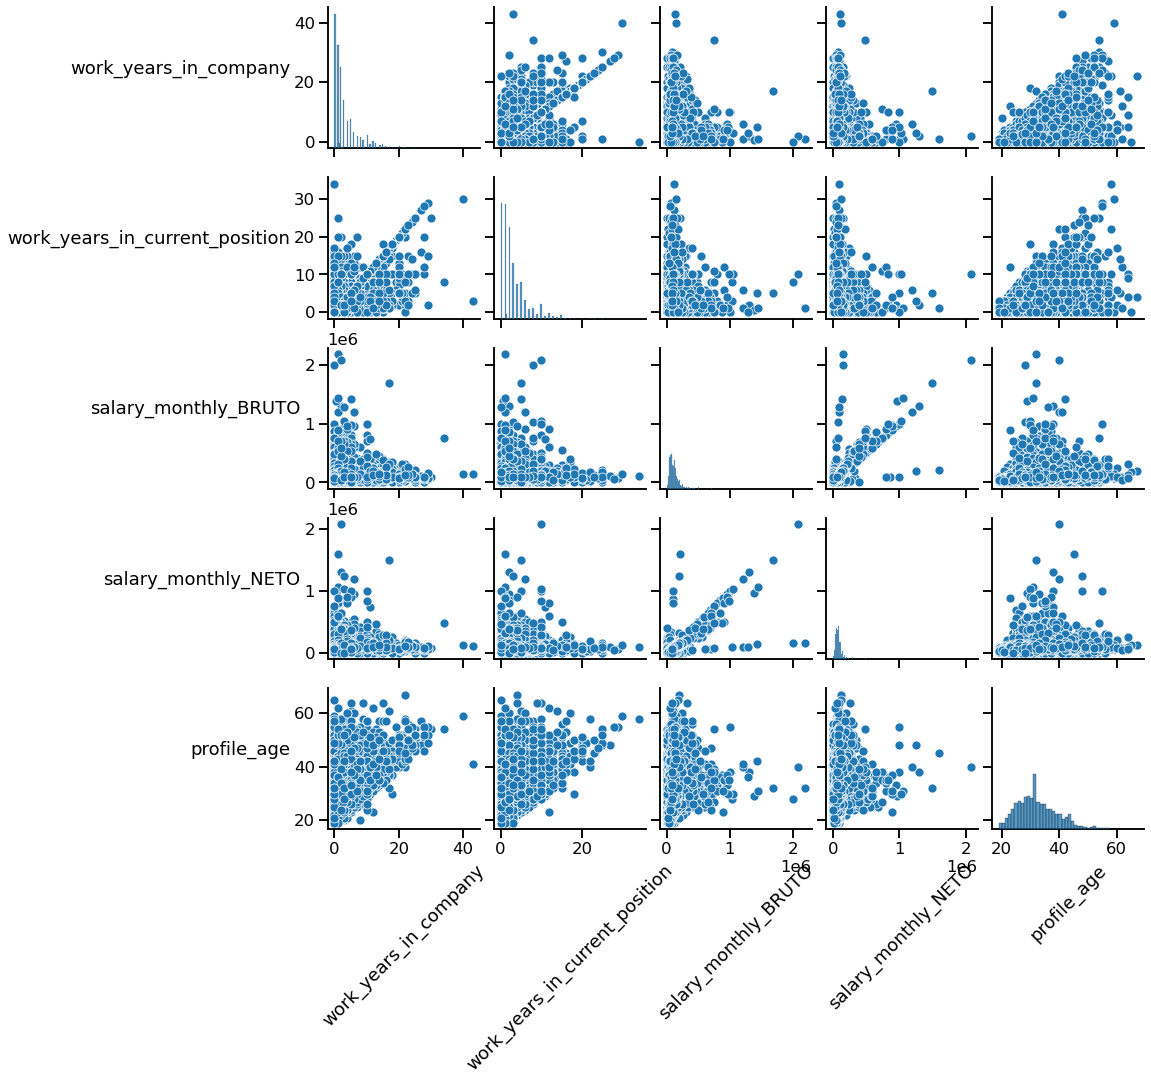

In [71]:

g = seaborn.pairplot(df_age_cleaned[['work_people_in_charge_of' , 'salary_monthly_BRUTO' , 'salary_monthly_NETO' , 'profile_age' ]])
for axes in g.axes.flat:
     axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
     axes.set_xlabel(axes.get_xlabel(), rotation=45)
#df.drop(rows_to_delete )

Como no se encuentra correlaciones entre variables, vamos a revisar la variable discreta **programming language**

In [145]:
#df_age_cleaned.groupby(['cured_programming_languages']).agg(['count'])
df_lang[['cured_programming_languages']].isnull().sum()

cured_programming_languages    0
dtype: int64

In [146]:
df_lang[['programming_language']]

,programming_language
0,ninguno
1,html
1,javascript
1,python
2,ninguno
...,...
6093,java
6093,javascript
6093,php
6093,python


In [297]:
df_lang.groupby(['programming_language'])[[ 'salary_monthly_NETO'  ]].max().sort_values(by=['salary_monthly_NETO'],ascending = False)[:20]

,salary_monthly_NETO
programming_language,
html,2080000.0
c,2080000.0
javascript,2080000.0
typescript,2080000.0
java,2080000.0
ruby,2080000.0
css,2080000.0
sql,2080000.0
bash/shell,2080000.0


In [299]:
#df_lang.groupby(['programming_language'])[[ 'salary_monthly_NETO'  ]].max().sort_values(by=['salary_monthly_NETO'],ascending = False)[:20]

In [205]:
df_lang.groupby(['work_role']).agg({'salary_monthly_NETO': ['mean', 'min', 'max' , 'count']}).sort_values(by=[('salary_monthly_NETO' , 'count')],ascending = False)[:20]

salary_monthly_NETO                            
                                              mean        min        max count
work_role                                                                     
Developer                             86430.340851      1.000  1030000.0  8503
SysAdmin / DevOps / SRE              102666.899695     37.250  1500000.0  1819
Technical Leader                     148846.559362     65.000  2080000.0  1380
Architect                            148129.111446     40.000  1066000.0   664
Manager / Director                   153591.038285     72.000   480000.0   653
QA / Tester                           79579.658569     36.000   560000.0   531
Project Manager                      102391.666968     86.877   418000.0   435
Data Scientist / Data Engineer       124911.792916     64.000  1190000.0   367
BI Analyst / Data Analyst             72766.434197      2.000   200000.0   284
Consultant                            75059.748939     51.000   200000.0   264
HelpDesk                              72110.308193     36.000   836400.0   238
Business Analyst                      80994.429646     17.300   340000.0   198
Infosec                              100156.740541     95.000   240000.0   185
Networking                            63289.735537     37.900   150000.0   177
DBA                                  131492.822695     27.000  1250000.0   141
VP / C-Level                         253477.919708  35000.000   964320.0   137
UX                                    58557.976923     15.000   200000.0   130
Designer                              55826.436320      9.000   130000.0   125
Scrum Master                          90929.174312  11000.000   220000.0   109
Product Manager                      183736.663158   4000.000   900000.0    95

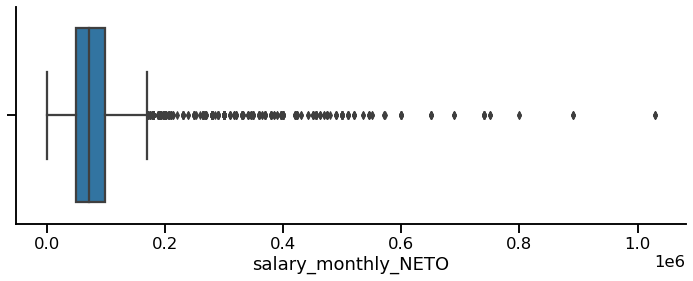

In [220]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_lang[df_lang['work_role'] == 'Developer']['salary_monthly_NETO'])
seaborn.despine()

In [221]:
df_lang[df_lang['work_role'] == 'Developer']['salary_monthly_NETO'].describe()

count    8.503000e+03
mean     8.643034e+04
std      8.009101e+04
min      1.000000e+00
25%      4.995000e+04
50%      7.200000e+04
75%      9.800000e+04
max      1.030000e+06
Name: salary_monthly_NETO, dtype: float64

In [248]:
df_lang[df_lang['work_role'] == 'Developer']['salary_monthly_NETO'].quantile([0.25,0.5,0.75])

0.25    49950.0
0.50    72000.0
0.75    98000.0
Name: salary_monthly_NETO, dtype: float64

In [249]:
RIC = df_lang[df_lang['work_role'] == 'Developer']['salary_monthly_NETO'].quantile([0.75]).values[0] - df_lang[df_lang['work_role'] == 'Developer']['salary_monthly_NETO'].quantile([0.25]).values[0]

In [250]:
RIC

48050.0

In [251]:
Ls = df_lang[df_lang['work_role'] == 'Developer']['salary_monthly_NETO'].quantile([0.75]).values[0] + RIC * 1.5
Li = df_lang[df_lang['work_role'] == 'Developer']['salary_monthly_NETO'].quantile([0.25]).values[0] - RIC * 1.5

In [254]:
Ls , Li

(170075.0, -22125.0)

In [269]:
df_lang[(df_lang['work_role'] == 'Developer') & (df_lang['salary_monthly_NETO'] >= Ls)]

,programming_language,tools_programming_languages,salary_monthly_NETO,profile_age,work_role,cured_programming_languages
26,java,"Java, Javascript, Objective-C, TypeScript",200000.0,24,Developer,"[java, javascript, objective-c, typescript]"
26,javascript,"Java, Javascript, Objective-C, TypeScript",200000.0,24,Developer,"[java, javascript, objective-c, typescript]"
26,objective-c,"Java, Javascript, Objective-C, TypeScript",200000.0,24,Developer,"[java, javascript, objective-c, typescript]"
26,typescript,"Java, Javascript, Objective-C, TypeScript",200000.0,24,Developer,"[java, javascript, objective-c, typescript]"
66,css,"CSS, Elixir, HTML, Javascript, Ruby, SQL, Type...",265000.0,30,Developer,"[css, elixir, html, javascript, ruby, sql, typ..."
...,...,...,...,...,...,...
5851,typescript,"Bash/Shell, CSS, Groovy, Java, Javascript, Kot...",180000.0,36,Developer,"[bash/shell, css, groovy, java, javascript, ko..."
6004,javascript,"Javascript, PHP, SQL",360000.0,29,Developer,"[javascript, php, sql]"
6004,php,"Javascript, PHP, SQL",360000.0,29,Developer,"[javascript, php, sql]"
6004,sql,"Javascript, PHP, SQL",360000.0,29,Developer,"[javascript, php, sql]"


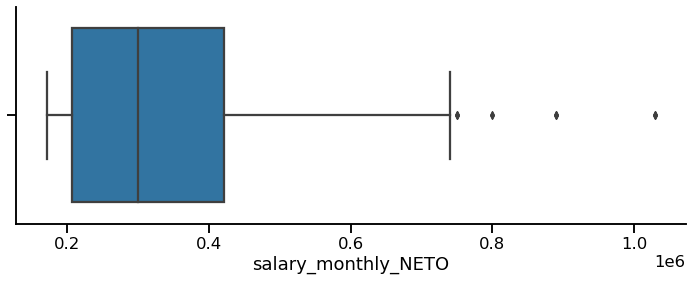

In [271]:


plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_lang[(df_lang['work_role'] == 'Developer') & (df_lang['salary_monthly_NETO'] >= Ls)]['salary_monthly_NETO'])
seaborn.despine()

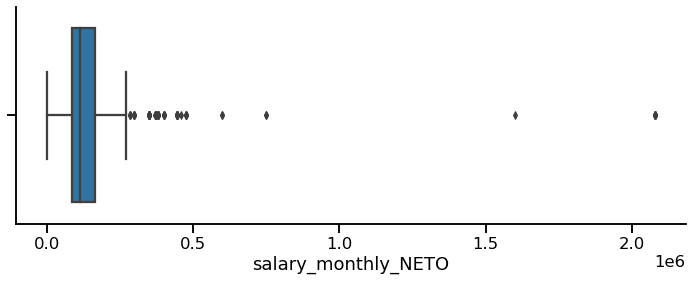

In [253]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_lang[df_lang['work_role'] == 'Technical Leader']['salary_monthly_NETO'])
seaborn.despine()

In [209]:
df_lang[df_lang['work_role'] == 'Technical Leader']['salary_monthly_NETO'].quantile([0.25,0.5,0.75])

0.25     86500.0
0.50    115000.0
0.75    165000.0
Name: salary_monthly_NETO, dtype: float64

In [187]:
df_lang[df_lang.salary_monthly_NETO > 2000000]

,programming_language,tools_programming_languages,salary_monthly_NETO,profile_age,work_role,cured_programming_languages
4486,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,40,Technical Leader,"[bash/shell, c, css, html, java, javascript, r..."
4486,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,40,Technical Leader,"[bash/shell, c, css, html, java, javascript, r..."
4486,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,40,Technical Leader,"[bash/shell, c, css, html, java, javascript, r..."
4486,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,40,Technical Leader,"[bash/shell, c, css, html, java, javascript, r..."
4486,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,40,Technical Leader,"[bash/shell, c, css, html, java, javascript, r..."
4486,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,40,Technical Leader,"[bash/shell, c, css, html, java, javascript, r..."
4486,ruby,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,40,Technical Leader,"[bash/shell, c, css, html, java, javascript, r..."
4486,sql,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,40,Technical Leader,"[bash/shell, c, css, html, java, javascript, r..."
4486,typescript,"Bash/Shell, C, CSS, HTML, Java, Javascript, Ru...",2080000.0,40,Technical Leader,"[bash/shell, c, css, html, java, javascript, r..."


In [181]:
result = df_lang.groupby(['programming_language']).agg({'salary_monthly_NETO': ['mean', 'min', 'max' , 'count']})

In [182]:
result.columns


MultiIndex([('salary_monthly_NETO',  'mean'),
            ('salary_monthly_NETO',   'min'),
            ('salary_monthly_NETO',   'max'),
            ('salary_monthly_NETO', 'count')],
           )

In [272]:
result.sort_values(by=[('salary_monthly_NETO' , 'count')],ascending = False)[:20]

salary_monthly_NETO                         
                                    mean     min        max count
programming_language                                             
javascript                 100349.853843   1.000  2080000.0  2409
sql                         92165.221091   1.000  2080000.0  2088
html                        91807.318308   1.000  2080000.0  1793
python                     110805.045791   1.000  1500000.0  1417
java                        99769.704651   1.000  2080000.0  1405
css                         92221.523950   1.000  2080000.0  1199
bash/shell                 110882.139431  37.250  2080000.0   961
php                         94281.415584   1.000   900000.0   853
.net                        89489.067340   1.000   740000.0   802
typescript                 111012.616366  13.000  2080000.0   743
c#                          92195.413123   1.000  1500000.0   714
ninguno                     82276.403040   1.000   440000.0   322
go                         140309.642509  34.030  1600000.0   291
c++                        101538.733132   1.000  1500000.0   265
c                          121209.941082   1.000  2080000.0   233
vba                         77274.997149  27.000   391000.0   221
kotlin                     114617.860456   1.000   535000.0   180
groovy                     109747.354623  63.000   360000.0   162
ruby                       162600.003444  27.342  2080000.0   144
scala                      165968.641027  60.000  1000000.0   111

In [274]:
result_programming_language_work_role = df_lang.groupby(['programming_language' , 'work_role']).agg({'salary_monthly_NETO': ['mean', 'min', 'max' , 'count']})

In [301]:
result_programming_language_work_role.sort_values(by=[('salary_monthly_NETO' , 'mean') , ('salary_monthly_NETO' , 'count')  ],ascending = False)[:20]

salary_monthly_NETO            \
                                                            mean       min   
programming_language work_role                                               
css                  Software engeniering          850000.000000  850000.0   
html                 Software engeniering          850000.000000  850000.0   
javascript           Software engeniering          850000.000000  850000.0   
ruby                 Software engeniering          850000.000000  850000.0   
sql                  Software engeniering          850000.000000  850000.0   
typescript           Software engeniering          850000.000000  850000.0   
html                 Manager                       800000.000000  800000.0   
php                  Manager                       800000.000000  800000.0   
elm                  Developer                     690000.000000  690000.0   
haskell              Developer                     690000.000000  690000.0   
bash/shell           Product Manager               493000.000000   86000.0   
c                    Product Manager               490000.000000   80000.0   
scala                VP / C-Level                  488106.666667  200000.0   
hcl                  SysAdmin / DevOps / SRE       480000.000000  480000.0   
smalltalk            SysAdmin / DevOps / SRE       477500.000000   85000.0   
elixir               VP / C-Level                  450000.000000  450000.0   
perl                 VP / C-Level                  400000.000000  300000.0   
hcl                  Manager / Director            348585.000000  348585.0   
c                    VP / C-Level                  345420.000000  345420.0   
python               VP / C-Level                  340978.333333  125000.0   

                                                              
                                                   max count  
programming_language work_role                                
css                  Software engeniering     850000.0     1  
html                 Software engeniering     850000.0     1  
javascript           Software engeniering     850000.0     1  
ruby                 Software engeniering     850000.0     1  
sql                  Software engeniering     850000.0     1  
typescript           Software engeniering     850000.0     1  
html                 Manager                  800000.0     1  
php                  Manager                  800000.0     1  
elm                  Developer                690000.0     1  
haskell              Developer                690000.0     1  
bash/shell           Product Manager          900000.0     2  
c                    Product Manager          900000.0     2  
scala                VP / C-Level             964320.0     3  
hcl                  SysAdmin / DevOps / SRE  480000.0     1  
smalltalk            SysAdmin / DevOps / SRE  870000.0     2  
elixir               VP / C-Level             450000.0     1  
perl                 VP / C-Level             500000.0     2  
hcl                  Manager / Director       348585.0     1  
c                    VP / C-Level             345420.0     1  
python               VP / C-Level             964320.0    12

In [302]:
result.sort_values(by=[('salary_monthly_NETO' , 'mean') , ('salary_monthly_NETO' , 'count')  ],ascending = False)[:20]

salary_monthly_NETO            \
                                                            mean       min   
programming_language work_role                                               
css                  Software engeniering          850000.000000  850000.0   
html                 Software engeniering          850000.000000  850000.0   
javascript           Software engeniering          850000.000000  850000.0   
ruby                 Software engeniering          850000.000000  850000.0   
sql                  Software engeniering          850000.000000  850000.0   
typescript           Software engeniering          850000.000000  850000.0   
html                 Manager                       800000.000000  800000.0   
php                  Manager                       800000.000000  800000.0   
elm                  Developer                     690000.000000  690000.0   
haskell              Developer                     690000.000000  690000.0   
bash/shell           Product Manager               493000.000000   86000.0   
c                    Product Manager               490000.000000   80000.0   
scala                VP / C-Level                  488106.666667  200000.0   
hcl                  SysAdmin / DevOps / SRE       480000.000000  480000.0   
smalltalk            SysAdmin / DevOps / SRE       477500.000000   85000.0   
elixir               VP / C-Level                  450000.000000  450000.0   
perl                 VP / C-Level                  400000.000000  300000.0   
hcl                  Manager / Director            348585.000000  348585.0   
c                    VP / C-Level                  345420.000000  345420.0   
python               VP / C-Level                  340978.333333  125000.0   

                                                              
                                                   max count  
programming_language work_role                                
css                  Software engeniering     850000.0     1  
html                 Software engeniering     850000.0     1  
javascript           Software engeniering     850000.0     1  
ruby                 Software engeniering     850000.0     1  
sql                  Software engeniering     850000.0     1  
typescript           Software engeniering     850000.0     1  
html                 Manager                  800000.0     1  
php                  Manager                  800000.0     1  
elm                  Developer                690000.0     1  
haskell              Developer                690000.0     1  
bash/shell           Product Manager          900000.0     2  
c                    Product Manager          900000.0     2  
scala                VP / C-Level             964320.0     3  
hcl                  SysAdmin / DevOps / SRE  480000.0     1  
smalltalk            SysAdmin / DevOps / SRE  870000.0     2  
elixir               VP / C-Level             450000.0     1  
perl                 VP / C-Level             500000.0     2  
hcl                  Manager / Director       348585.0     1  
c                    VP / C-Level             345420.0     1  
python               VP / C-Level             964320.0    12

In [180]:
df_lang.programming_language.value_counts()

javascript    2513
sql           2154
html          1861
python        1475
java          1453
              ... 
xamarin          1
velocity         1
svelte           1
nosql            1
peoplesoft       1
Name: programming_language, Length: 205, dtype: int64

In [152]:
df_lang.work_role.unique()

array(['Consultant', 'Developer', 'Infosec', 'SysAdmin / DevOps / SRE',
       'Manager / Director', 'Technical Leader',
       'Data Scientist / Data Engineer', 'DBA', 'Project Manager',
       'Business Analyst', 'QA / Tester', 'Architect', 'Product Manager',
       'Designer', 'BI Analyst / Data Analyst', 'Middleware',
       'VP / C-Level', 'Storage / Backup', 'Networking', 'HelpDesk', 'UX',
       'Ux User Research Analyst', 'Jefe de infraestructura ',
       'Scrum Master', 'Sales / Pre-Sales', 'Team leader',
       'Microinformatica', 'Technical Writer',
       'Implementadora de software ', 'Desarrollador BI',
       'Martech Specialist', 'Software Configuration Management',
       'Maquetador/Diseño UI', 'Service manager', 'Release Manager',
       'Access Management Analyst', 'DevOps Cloud Engineer',
       'Soporte e Infraestructura', 'Recruiter / HR', 'tecnico',
       'Finance', 'Data Visualization', 'Implementador de Software',
       'back end', 'Software Engineer', 'NLP

In [150]:
df_lang.groupby(['work_role'])[[ 'salary_monthly_NETO'  ]].mean().sort_values(by=['salary_monthly_NETO'],ascending = False)[:20]

,salary_monthly_NETO
work_role,
Software engeniering,850000.000000
Manager,800000.000000
Principal of Engineering,324075.000000
Technical Lead Devops,320000.000000
Head of Engineering,260000.000000
Founder/CEO/Developer/Designer/Product Manager... TODO,257000.000000
VP / C-Level,253477.919708
Subject Matter Expert (simil a director pero sin el management),230000.000000
Program Manager,230000.000000


In [215]:
df_age_cleaned.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='profile_age', ylabel='Density'>

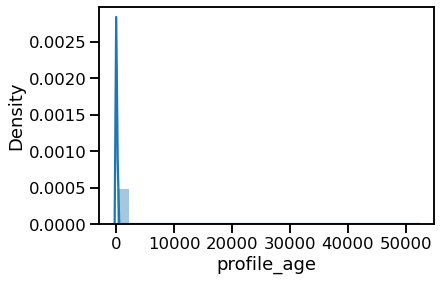

In [305]:
fig, ax = plt.subplots()
seaborn.distplot(df_lang.profile_age[df_lang.profile_age < 100], bins=25)
ax.set_xlim(10,65)
ax.set_xticks( range(15,65,5))

In [314]:
df.salary_monthly_NETO[df.profile_age > 100]

1659    100000.0
5752     52000.0
Name: salary_monthly_NETO, dtype: float64

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
